Let's import all libraries needed!

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We load our Excel Dataset:

In [3]:
df_report = pd.read_excel('./18-proyecto-final-busaccidentsdata.xlsx')

Display our column names:

In [4]:
df_report.columns

Index(['Year', 'Date Of Incident', 'Route', 'Operator', 'Group Name',
       'Bus Garage', 'Borough', 'Injury Result Description',
       'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age'],
      dtype='object')

Simplify the column names, like this:

In [5]:
names = ['Year', 'Date', 'Route', 'Operator', 'Group', 'Garage', 'Borough', 'Injury', 'Incident', 'Victim', 'Sex', 'Age']

Create the Data Frame:

In [6]:
df_report = pd.read_excel('./18-proyecto-final-busaccidentsdata.xlsx',header = 0, names = names)

Check column names:

In [7]:
df_report.head()

,Year,Date,Route,Operator,Group,Garage,Borough,Injury,Incident,Victim,Sex,Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


Check Data Integrity (Size and Data types)

In [8]:
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      23158 non-null  int64         
 1   Date      23158 non-null  datetime64[ns]
 2   Route     23158 non-null  object        
 3   Operator  23158 non-null  object        
 4   Group     23158 non-null  object        
 5   Garage    23158 non-null  object        
 6   Borough   23158 non-null  object        
 7   Injury    23158 non-null  object        
 8   Incident  23158 non-null  object        
 9   Victim    23158 non-null  object        
 10  Sex       23158 non-null  object        
 11  Age       23158 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 2.1+ MB


## ANALYSIS AND GRAPHICS

In [9]:
df_sorted = df_report.loc[:, ['Year', 'Route', 'Sex']]
df_sorted

,Year,Route,Sex
0,2015,1,Male
1,2015,4,Male
2,2015,5,Male
3,2015,5,Male
4,2015,6,Female
...,...,...,...
23153,2018,(blank),Male
23154,2018,(blank),Male
23155,2018,(blank),Male
23156,2018,(blank),Male


### Count accidents by Year:

In [10]:
df_sorted.groupby('Year').count()

,Route,Sex
Year,,
2015,5715,5715
2016,6093,6093
2017,6573,6573
2018,4777,4777


### Now we have incidents by year:
* 2015: 5715
* 2016: 6093
* 2017: 6573
* 2018: 4777

### And we can see incidents grouped by sex:

In [11]:
df_sorted

,Year,Route,Sex
0,2015,1,Male
1,2015,4,Male
2,2015,5,Male
3,2015,5,Male
4,2015,6,Female
...,...,...,...
23153,2018,(blank),Male
23154,2018,(blank),Male
23155,2018,(blank),Male
23156,2018,(blank),Male


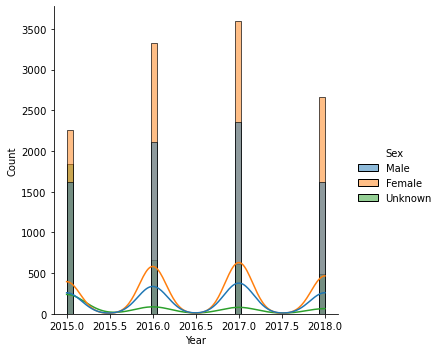

In [12]:
g = sns.displot(data= df_sorted, x= 'Year', hue='Sex', kde=True)

### Group incidents by age, mostly adults:

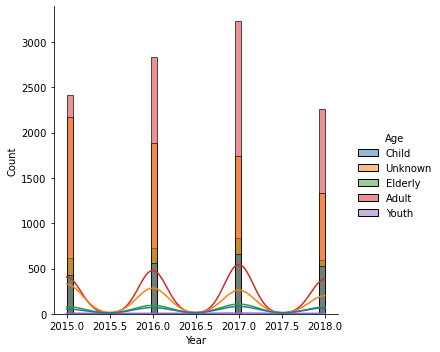

In [13]:
sns.displot(data= df_report, x= 'Year', hue='Age', kde=True)

### We can see that main victims are Passengers:

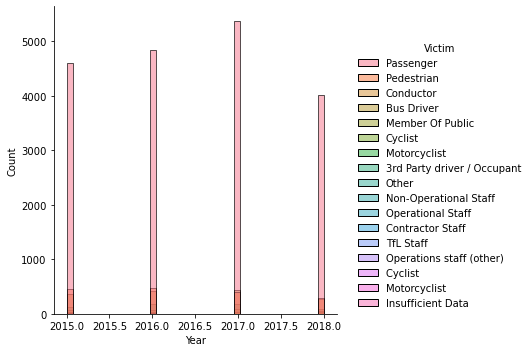

In [19]:
sns.displot(data= df_report, x= 'Year', hue='Victim')

### The most important insight is the incidents stat, sorted by Station (Route):

In [31]:
df_sorted['Route'].value_counts()

OOS    321
18     191
55     177
24     165
73     156
      ... 
W12      1
N28      1
643      1
632      1
R10      1
Name: Route, Length: 612, dtype: int64

### Sorted by Borough

In [32]:
df_report['Borough'].value_counts()

Metroline                3457
Arriva London North      3208
East London              2402
London United            2263
Selkent                  1808
Arriva London South      1743
London General           1723
London Central           1367
Metroline West           1232
Abellio London            963
Metrobus                  786
Tower Transit             738
Arriva The Shires         305
Blue Triangle Buses       281
London Sovereign          206
Quality Line              142
Abellio West              126
Arriva Kent Thameside     107
Docklands Buses           100
C T Plus                   77
TGM GROUP                  61
H R Richmond               59
Sullivan Buses              2
Uno Buses                   1
Sullivan Bus & Coach        1
Name: Operator, dtype: int64

### Sorted by Incident:

In [33]:
df_report['Incident'].value_counts()

Slip Trip Fall             6981
Onboard Injuries           6563
Personal Injury            4596
Collision Incident         4166
Assault                     590
Activity Incident Event     114
Vandalism Hooliganism        73
Safety Critical Failure      66
Fire                          6
Robbery                       3
Name: Incident, dtype: int64

### Sorted by Group:

In [34]:
df_report['Group'].value_counts()

Arriva London            4945
Metroline                4690
Go-Ahead                 4258
Stagecoach               4192
London United            2469
Abellio                  1089
Tower Transit             757
Arriva The Shires         306
Quality Line              201
Arriva Kent Thameside     107
CT Plus                    77
TGM                        63
Sullivan Buses              3
Uno Buses                   1
Name: Group, dtype: int64

### Sorted by Operator:

In [35]:
df_report['Operator'].value_counts()

Metroline                3457
Arriva London North      3208
East London              2402
London United            2263
Selkent                  1808
Arriva London South      1743
London General           1723
London Central           1367
Metroline West           1232
Abellio London            963
Metrobus                  786
Tower Transit             738
Arriva The Shires         305
Blue Triangle Buses       281
London Sovereign          206
Quality Line              142
Abellio West              126
Arriva Kent Thameside     107
Docklands Buses           100
C T Plus                   77
TGM GROUP                  61
H R Richmond               59
Sullivan Buses              2
Uno Buses                   1
Sullivan Bus & Coach        1
Name: Operator, dtype: int64